### <font color='#008abc'>Clustering & PCA Assignment - Categorization of countries based on the soci-economic factos</font>

<b>Problem Statement</b>

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. 
After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

<b>Business Goal</b>

- Categorise the countries using some socio-economic and health factors that determine the overall development of the country.
- Suggest the countries which the CEO needs to focus on the most. 

### <font color='#008abc'><u>Data Preparation</u></font> :

In [165]:
# Import the required libraries

# Analysis and computation
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'x-large',
         'axes.labelcolor': '#008abc',
         'axes.titlesize':'20',
         'text.color':'green',
         'axes.titlepad': 35,
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')
%config IPCompleter.greedy=True

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Input Data 

In [166]:
country_data = pd.read_csv('Country-data.csv')

In [167]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [168]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


There are no NULL entries and the data types are also as expected

In [169]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Data Dictionary

In [170]:
data_dictionary = pd.read_csv('data-dictionary.csv')
pd.set_option('display.max_colwidth', -1)
data_dictionary

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services. Given as %age of the Total GDP
3,health,Total health spending as %age of Total GDP
4,imports,Imports of goods and services. Given as %age of the Total GDP
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


We find that the columns `exports,health and imports` are expressed as % of Total GDP. We will perform data conversion to 
convert  thse columns to their actual values.

### <font color='#008abc'>Data conversion </font>

In [171]:
## Fetching actual values from the given percentage values
country_data['exports']=(country_data['exports']/country_data['gdpp'])*100
country_data['health']=(country_data['health']/country_data['gdpp'])*100
country_data['imports']=(country_data['imports']/country_data['gdpp'])*100

In [172]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,1.441084,0.355765,2.395925,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,1.829798,0.646116,3.738993,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.011032,0.002575,0.006670,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,0.273842,0.041148,0.244265,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,0.733918,0.119816,0.921127,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,1.878930,0.396947,2.729061,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,12.305389,5.021645,28.318043,125000.000000,104.000000,82.800000,7.490000,105000.000000


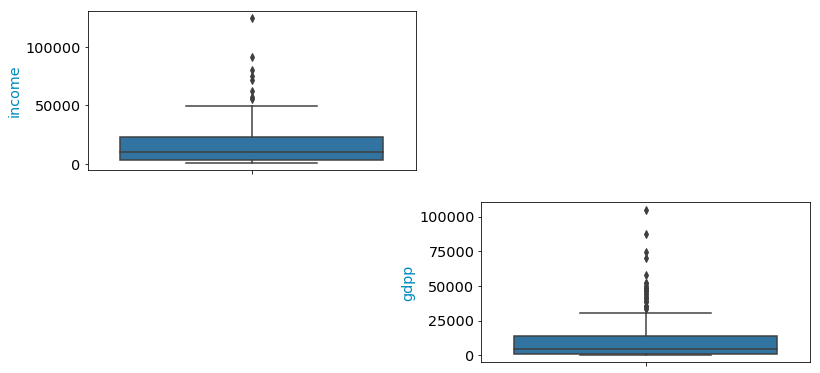

In [173]:
plt.figure(figsize=(20, 10))
# plt.subplot(3,3,1)
# sns.boxplot( y = 'child_mort', data = country_data)
# plt.subplot(3,3,2)
# sns.boxplot(y = 'exports', data = country_data)
# plt.subplot(3,3,3)
# sns.boxplot(y = 'health',  data = country_data)
# plt.subplot(3,3,4)
# sns.boxplot(y = 'imports',  data = country_data)
plt.subplot(3,3,5)
sns.boxplot(y = 'income',  data = country_data)
# plt.subplot(3,3,6)
# sns.boxplot(y = 'inflation',  data = country_data)
# plt.subplot(3,3,7)
# sns.boxplot(y = 'life_expec',  data = country_data)
# plt.subplot(3,3,8)
# sns.boxplot(y = 'total_fer',  data = country_data)
plt.subplot(3,3,9)
sns.boxplot(y = 'gdpp',  data = country_data)
plt.show()

When a country's GDP is high it means that the production is more and the income of the people are high and hence they are spending more. Hence,
as we have huge outliers in the GDP column and as Outliers are sensitive to clustering , we can remove countires with very high GDP, as our Aim is to find the poorest countries that are in dire need of AID

In [174]:
country_fil = country_data.loc[country_data['gdpp']<=70000]  

In [175]:
country_fil.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,39.089571,1.474078,0.364274,2.453046,15513.269939,7.869319,70.299387,2.976319,11210.515337
std,40.474921,1.839852,0.651715,3.766717,15822.640217,10.677805,8.846381,1.520952,14510.029025
min,2.600000,0.011032,0.006831,0.006670,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.650000,0.305251,0.047939,0.283511,3330.000000,1.810000,64.950000,1.820000,1310.000000
50%,19.800000,0.819231,0.122802,0.953737,9930.000000,5.390000,72.800000,2.470000,4560.000000
75%,62.200000,1.984256,0.400949,2.854079,21450.000000,11.000000,76.650000,3.995000,13000.000000
max,208.000000,12.305389,5.021645,28.318043,80600.000000,104.000000,82.800000,7.490000,58000.000000


In [176]:
country_fil.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,1.808318,1.370705,8.119349,1610,9.44,56.2,5.82,553
1,Albania,16.6,0.684597,0.160147,1.188264,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,0.860987,0.093498,0.704036,12900,16.10,76.5,2.89,4460
3,Angola,119.0,1.764873,0.080737,1.215297,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,0.372951,0.049426,0.482787,19100,1.44,76.8,2.13,12200


### <font color='#008abc'>Data Analysis </font>

Let's first scale the data to have the all the variables on the same scale

In [177]:
from sklearn.preprocessing import StandardScaler

In [178]:
std_scaler = StandardScaler()

In [179]:
country_numeric = country_fil.copy()
country_numeric.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,39.089571,1.474078,0.364274,2.453046,15513.269939,7.869319,70.299387,2.976319,11210.515337
std,40.474921,1.839852,0.651715,3.766717,15822.640217,10.677805,8.846381,1.520952,14510.029025
min,2.600000,0.011032,0.006831,0.006670,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.650000,0.305251,0.047939,0.283511,3330.000000,1.810000,64.950000,1.820000,1310.000000
50%,19.800000,0.819231,0.122802,0.953737,9930.000000,5.390000,72.800000,2.470000,4560.000000
75%,62.200000,1.984256,0.400949,2.854079,21450.000000,11.000000,76.650000,3.995000,13000.000000
max,208.000000,12.305389,5.021645,28.318043,80600.000000,104.000000,82.800000,7.490000,58000.000000


In [180]:
country_numeric.drop(['country'],axis=1,inplace=True)

In [181]:
country_scaled_df = std_scaler.fit_transform(country_numeric)

In [182]:
country_scaled_df

array([[ 1.2666593 ,  0.18222664,  1.54904016, ..., -1.59871435,
         1.87543295, -0.73675651],
       [-0.55735442, -0.43042307, -0.31418031, ...,  0.68040314,
        -0.87471921, -0.49224288],
       [-0.29217851, -0.33425579, -0.41676244, ...,  0.70308093,
        -0.05692816, -0.46666469],
       ...,
       [-0.39130969,  2.19283962,  0.24297448, ...,  0.31755857,
        -0.67686654, -0.68442492],
       [ 0.42652255,  0.44487971,  0.04793827, ..., -0.31741944,
         1.1169977 , -0.68442492],
       [ 1.09070146,  0.5780006 ,  0.0602588 , ..., -2.07494785,
         1.59843921, -0.67405539]])

### PCA

In [183]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [184]:
pca.fit(country_scaled_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [185]:
### list the PCA components
pca.components_

array([[ 0.3778049 ,  0.35138543,  0.33105797,  0.35473005, -0.33033563,
         0.11512623, -0.37938585,  0.36682912, -0.31222756],
       [ 0.07258101, -0.266005  , -0.40525737, -0.41715575, -0.2895199 ,
         0.57918633, -0.11683859,  0.05667364, -0.38675464],
       [ 0.21808672,  0.01526768,  0.11017458,  0.03030367,  0.50359552,
         0.61862556, -0.03446938,  0.26512861,  0.48099997],
       [-0.45384849,  0.22605133,  0.29714522,  0.2935438 , -0.11993122,
         0.49906299,  0.40530801, -0.31714504, -0.20039007],
       [ 0.05212146, -0.78286135,  0.59811343,  0.04529663, -0.05274666,
         0.0105387 , -0.10272071, -0.09067214, -0.05434832],
       [ 0.14692446,  0.09833699, -0.0920877 ,  0.12875176,  0.20460465,
         0.09791382, -0.57473226, -0.74919085, -0.02513159],
       [-0.42005384, -0.00412169,  0.03835197, -0.02515891,  0.61636599,
        -0.0726167 , -0.25447055,  0.28025394, -0.54125428],
       [ 0.34177806,  0.31384875,  0.4382404 , -0.65520419,  0

In [186]:
### Variance Ratio
pca.explained_variance_ratio_

array([0.60024147, 0.13721683, 0.10554033, 0.06579394, 0.03662696,
       0.02546328, 0.01109669, 0.00931822, 0.00870228])

#### Scree Plot

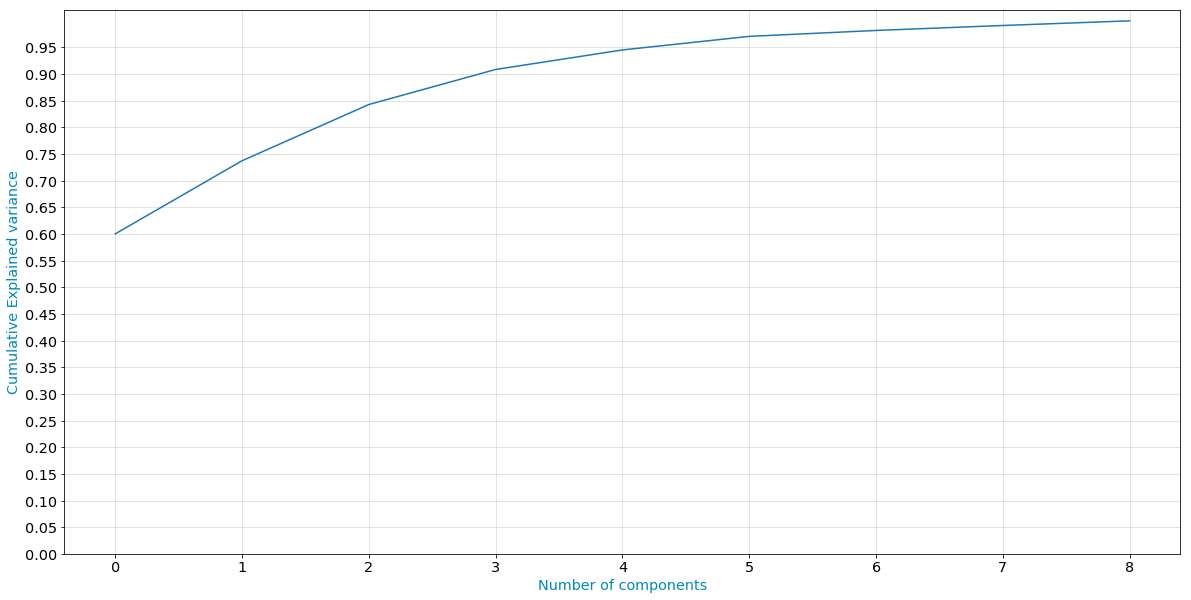

In [188]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained variance')
plt.rc('grid', linestyle="-", color='gainsboro')
plt.yticks(np.arange(0, 1.0, 0.05))
plt.grid()
plt.show()

### Close to 95% of the data is explined by 4 components, and post 4 components there is no steep increase

In [1]:
colnames = list(country_numeric.columns)
pca_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],})
pca_df

NameError: name 'country_numeric' is not defined

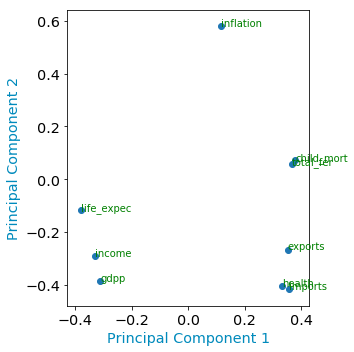

In [223]:
fig = plt.figure(figsize = (5,5))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

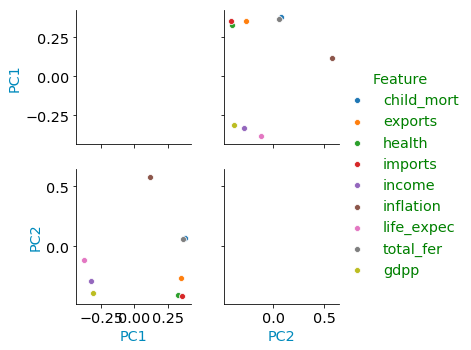

In [191]:
sns.pairplot(pca_df,hue='Feature')

In [192]:
#Finally let's go ahead and do dimenstionality reduction using the two Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=2)

In [193]:
final_pca = pca_final.fit_transform(country_scaled_df)
final_pca.shape

(163, 2)

In [194]:
final = pd.DataFrame(final_pca)

In [195]:
final.columns=['PC1','PC2']

In [196]:
final.head()

,PC1,PC2
0,-3.423875,0.356904
1,0.930735,-0.536740
2,0.530304,-0.946656
3,-2.275339,-1.558132
4,1.477701,-0.115828


In [197]:
final.shape

(163, 2)

In [198]:
# sns.pairplot(final)

In [199]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [200]:
hopkins(final)

0.8704014729797962

### Silhouette score

In [201]:
dat3_1=final

In [202]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])

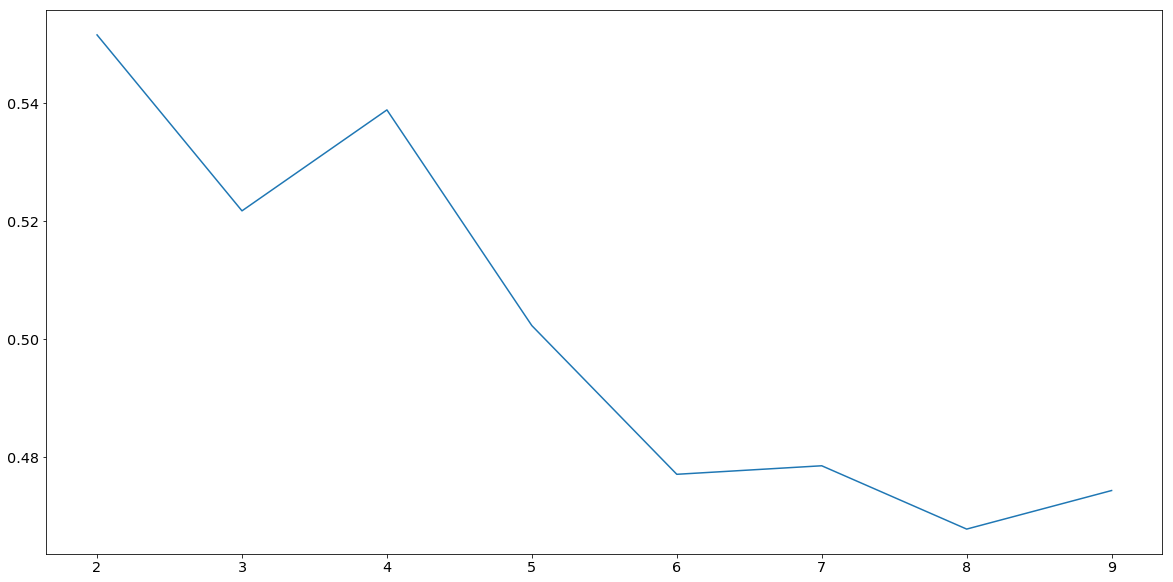

In [203]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

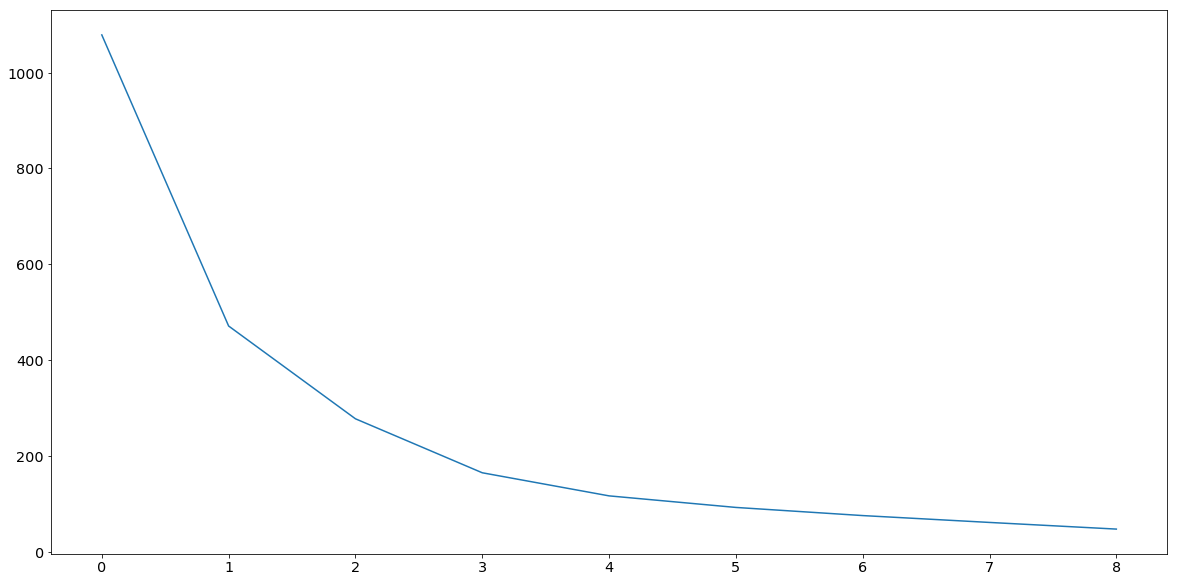

In [204]:
## From the above analysis we find that 2 seems to be a good number of clusters for K means algorithm
#Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [205]:
#Here also we're seeing a distinct bend at around 2 clusters. Hence it seems a good K to choose.
#Let's perform K means using K=2
model_clus2 = KMeans(n_clusters = 2, max_iter=50,random_state = 50)
model_clus2.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [206]:
dat4=final
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','ClusterID']
dat_km

,PC1,PC2,ClusterID
0,-3.423875,0.356904,0
1,0.930735,-0.536740,1
2,0.530304,-0.946656,1
3,-2.275339,-1.558132,0
4,1.477701,-0.115828,1
5,1.130497,-0.939575,1
6,0.654818,-0.806417,1
7,3.249095,1.724115,1
8,3.217823,1.618235,1
9,0.470156,-0.887362,1


In [207]:
dat_km['ClusterID'].value_counts()

1    116
0    47 
Name: ClusterID, dtype: int64

In [208]:
# sns.pairplot(dat_km,hue='ClusterID')
dat_km.head()

,PC1,PC2,ClusterID
0,-3.423875,0.356904,0
1,0.930735,-0.536740,1
2,0.530304,-0.946656,1
3,-2.275339,-1.558132,0
4,1.477701,-0.115828,1


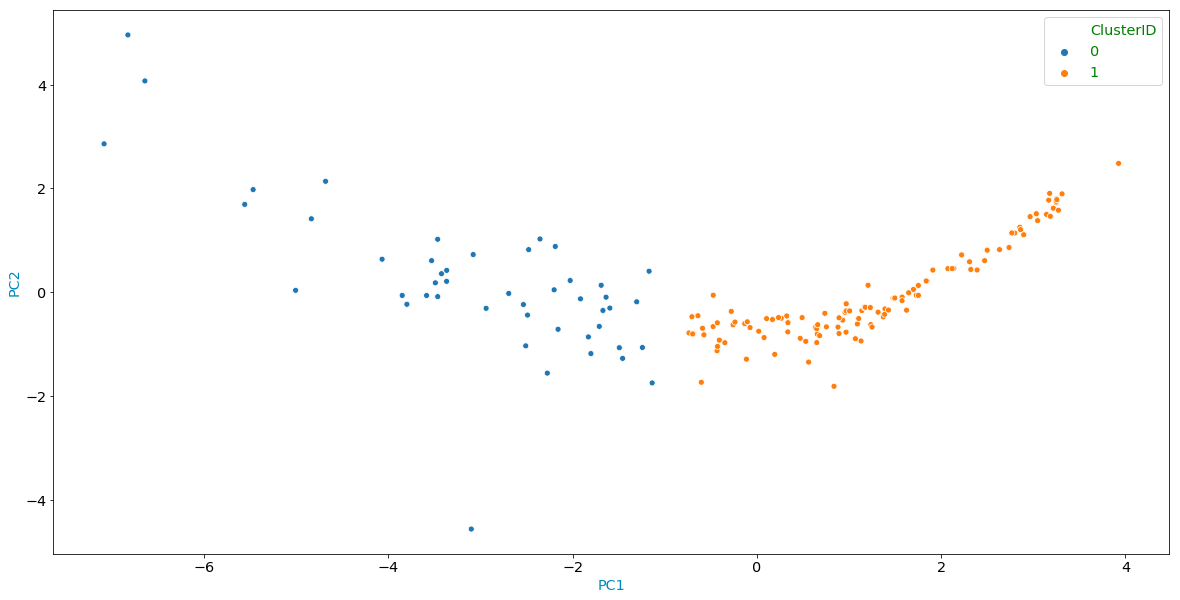

In [209]:
sns.scatterplot(x=dat_km['PC1'],y=dat_km['PC2'],data=dat_km,hue='ClusterID')

In [214]:
dat5=pd.merge(country_fil,dat_km ,left_index=True,right_index=True)
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,ClusterID
0,Afghanistan,90.2,1.808318,1.370705,8.119349,1610,9.44,56.2,5.82,553,-3.423875,0.356904,0
1,Albania,16.6,0.684597,0.160147,1.188264,9930,4.49,76.3,1.65,4090,0.930735,-0.536740,1
2,Algeria,27.3,0.860987,0.093498,0.704036,12900,16.10,76.5,2.89,4460,0.530304,-0.946656,1
3,Angola,119.0,1.764873,0.080737,1.215297,5900,22.40,60.1,6.16,3530,-2.275339,-1.558132,0
4,Antigua and Barbuda,10.3,0.372951,0.049426,0.482787,19100,1.44,76.8,2.13,12200,1.477701,-0.115828,1


In [215]:
Cluster1 = dat5.loc[dat5['ClusterID']==1]

In [216]:
Cluster0 =dat5.loc[dat5['ClusterID']==0]

In [217]:
Cluster1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,ClusterID
count,115.00000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.0
mean,26.72087,0.952767,0.208613,1.316380,19039.373913,7.666817,72.948696,2.508348,13921.721739,1.228396,-0.071367,1.0
std,30.87081,1.312706,0.410811,2.076838,15837.978821,11.479708,6.926676,1.225734,15401.163516,1.216262,0.908364,0.0
min,2.60000,0.011032,0.006831,0.006670,918.000000,-4.210000,53.100000,1.230000,399.000000,-0.737042,-1.812125,1.0
25%,6.85000,0.222765,0.037637,0.203123,7325.000000,1.420000,69.800000,1.640000,3165.000000,0.294023,-0.675597,1.0
50%,15.70000,0.553785,0.083923,0.611009,14500.000000,5.440000,74.500000,2.150000,6840.000000,1.139289,-0.368877,1.0
75%,32.60000,1.036876,0.187213,1.371291,28500.000000,10.350000,77.650000,2.720000,19300.000000,2.128521,0.446275,1.0
max,160.00000,8.237705,3.283208,11.741803,80600.000000,104.000000,82.800000,6.550000,58000.000000,3.925777,2.482014,1.0


In [218]:
Cluster0.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,ClusterID
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.0
mean,70.884091,2.731249,0.773380,5.396996,7054.204545,6.941250,63.675000,4.140682,4744.000000,-3.121920,0.240611,0.0
std,46.182217,2.320675,0.955788,5.408536,12749.422914,6.204439,9.757195,1.589119,9747.668465,1.522317,1.491894,0.0
min,2.800000,0.083062,0.008498,0.083086,609.000000,-0.046000,32.100000,1.150000,231.000000,-7.086602,-4.561761,0.0
25%,32.525000,1.068162,0.152830,1.459510,1427.500000,2.595000,57.975000,3.045000,572.000000,-3.639450,-0.320499,0.0
50%,65.350000,2.198776,0.522957,4.579293,2500.000000,4.225000,62.500000,4.440000,1070.000000,-2.816722,0.006552,0.0
75%,108.250000,3.491009,0.921804,7.576947,5367.500000,9.580000,69.000000,5.225000,3110.000000,-1.893681,0.658255,0.0
max,208.000000,12.305389,5.021645,28.318043,72100.000000,22.400000,82.700000,7.490000,46600.000000,-1.170483,4.955534,0.0


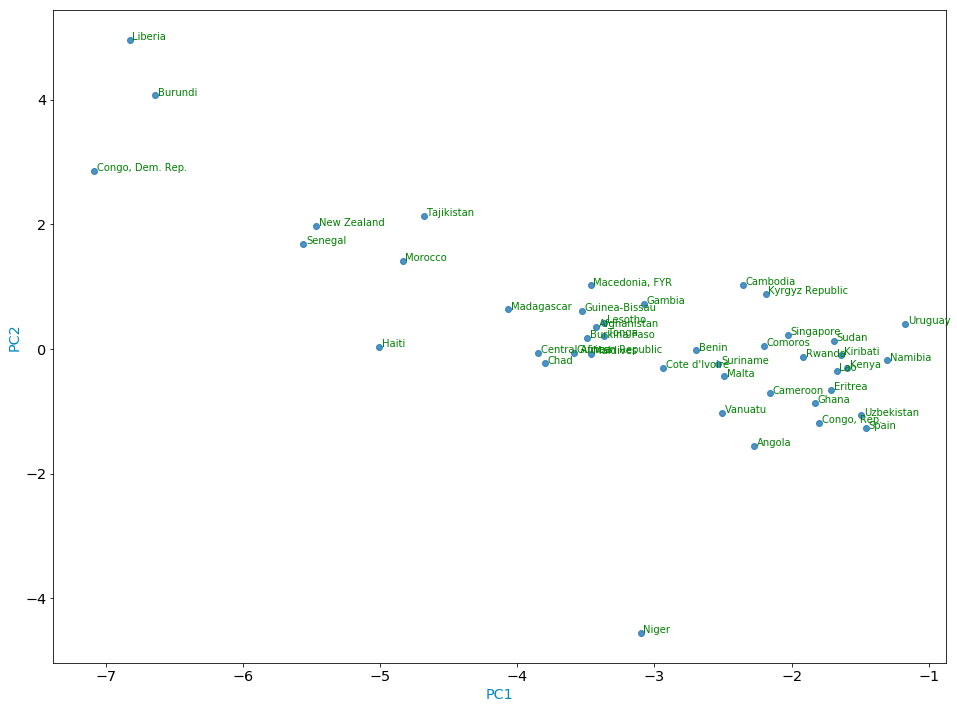

In [219]:
plt.figure(figsize=(16, 12))
sns.regplot(x='PC1', y='PC2', data=Cluster0, fit_reg=False)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(Cluster0.PC1, Cluster0.PC2, Cluster0.country, plt.gca()) 

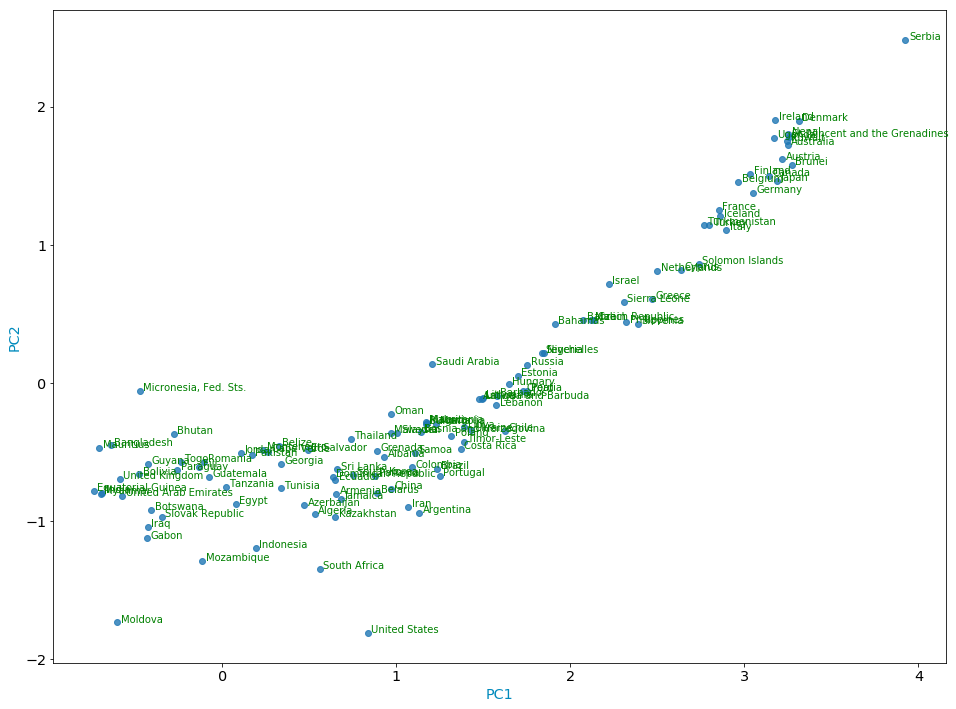

In [220]:
plt.figure(figsize=(16, 12))
sns.regplot(x='PC1', y='PC2', data=Cluster1, fit_reg=False)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(Cluster1.PC1, Cluster1.PC2, Cluster1.country, plt.gca()) 

In [221]:
Cluster1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,ClusterID
count,115.00000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.0
mean,26.72087,0.952767,0.208613,1.316380,19039.373913,7.666817,72.948696,2.508348,13921.721739,1.228396,-0.071367,1.0
std,30.87081,1.312706,0.410811,2.076838,15837.978821,11.479708,6.926676,1.225734,15401.163516,1.216262,0.908364,0.0
min,2.60000,0.011032,0.006831,0.006670,918.000000,-4.210000,53.100000,1.230000,399.000000,-0.737042,-1.812125,1.0
25%,6.85000,0.222765,0.037637,0.203123,7325.000000,1.420000,69.800000,1.640000,3165.000000,0.294023,-0.675597,1.0
50%,15.70000,0.553785,0.083923,0.611009,14500.000000,5.440000,74.500000,2.150000,6840.000000,1.139289,-0.368877,1.0
75%,32.60000,1.036876,0.187213,1.371291,28500.000000,10.350000,77.650000,2.720000,19300.000000,2.128521,0.446275,1.0
max,160.00000,8.237705,3.283208,11.741803,80600.000000,104.000000,82.800000,6.550000,58000.000000,3.925777,2.482014,1.0
